In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
import pandas as pd, numpy, string
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
#Remove Special Charactors
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv (r'C:\Users\LikwaGear\Desktop\fake\sent_result.csv') 

In [3]:
porter=PorterStemmer()
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    #Stemming
    stem_sentence=[]
    for word in words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    words="".join(stem_sentence).strip()
    return words
nums = [0,len(data)]
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    clean_tweet_texts.append(tweet_cleaner(data['Message'][i]))
data_clean = pd.DataFrame(clean_tweet_texts,columns=['Message'])
data_clean['Analysis'] = data.Analysis

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "http://www.hearme.com/vc2/?chnlOwnr=pallen@enron.com
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "http://ectpdx-sunone.ect.enron.com/~theizen/wsccnav/
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://www4.rsweb.com/61045/
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['Message'], data_clean['Analysis'], test_size=0.2, random_state=0)

In [5]:
#label encode the target variable 
from sklearn import model_selection, preprocessing
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(y_train)
test_y = encoder.fit_transform(y_test)

In [6]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
tfidf_vect.fit(data_clean['Message'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(xtrain_tfidf, train_y)

RandomForestClassifier(n_estimators=200, random_state=0)

In [8]:
predictions = text_classifier.predict(xtrain_tfidf)
predictions1 = text_classifier.predict(xvalid_tfidf)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(train_y,predictions))
print(classification_report(train_y,predictions))
print(accuracy_score(train_y, predictions))
print(confusion_matrix(test_y,predictions1))
print(classification_report(test_y,predictions1))
print(accuracy_score(test_y, predictions1))

[[1062    1    2]
 [   0 3633    7]
 [   1    8 6760]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1065
           1       1.00      1.00      1.00      3640
           2       1.00      1.00      1.00      6769

    accuracy                           1.00     11474
   macro avg       1.00      1.00      1.00     11474
weighted avg       1.00      1.00      1.00     11474

0.998344082272965
[[ 112   47  121]
 [   0  868   54]
 [   1  158 1508]]
              precision    recall  f1-score   support

           0       0.99      0.40      0.57       280
           1       0.81      0.94      0.87       922
           2       0.90      0.90      0.90      1667

    accuracy                           0.87      2869
   macro avg       0.90      0.75      0.78      2869
weighted avg       0.88      0.87      0.86      2869

0.8672011153712095


Text(0.5, 257.44, 'Predicted label')

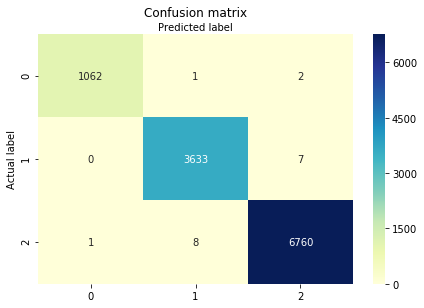

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix=confusion_matrix(train_y,predictions)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

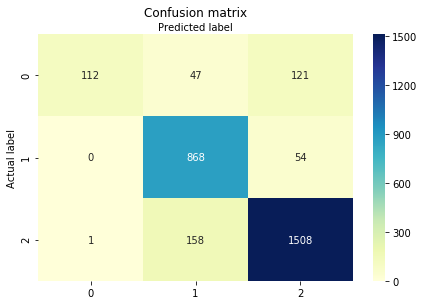

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix=confusion_matrix(test_y,predictions1)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=7)
classifier1.fit(xtrain_tfidf, train_y)
predictions = classifier1.predict(xtrain_tfidf)
predictions1 = classifier1.predict(xvalid_tfidf)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(train_y,predictions))
print(classification_report(train_y,predictions))
print(accuracy_score(train_y, predictions))
print(confusion_matrix(test_y,predictions1))
print(classification_report(test_y,predictions1))
print(accuracy_score(test_y, predictions1))

[[ 359  514  192]
 [  10 3595   35]
 [  68 2957 3744]]
              precision    recall  f1-score   support

           0       0.82      0.34      0.48      1065
           1       0.51      0.99      0.67      3640
           2       0.94      0.55      0.70      6769

    accuracy                           0.67     11474
   macro avg       0.76      0.63      0.62     11474
weighted avg       0.79      0.67      0.67     11474

0.6709081401429319
[[ 60 156  64]
 [  1 912   9]
 [ 18 845 804]]
              precision    recall  f1-score   support

           0       0.76      0.21      0.33       280
           1       0.48      0.99      0.64       922
           2       0.92      0.48      0.63      1667

    accuracy                           0.62      2869
   macro avg       0.72      0.56      0.54      2869
weighted avg       0.76      0.62      0.61      2869

0.6190310212617637


Text(0.5, 257.44, 'Predicted label')

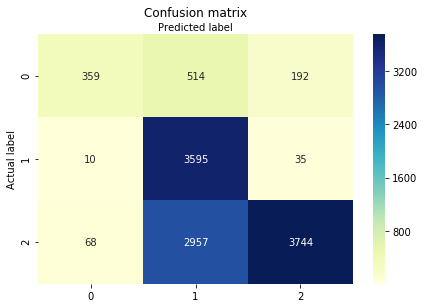

In [20]:
cnf_matrix=confusion_matrix(train_y,predictions)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

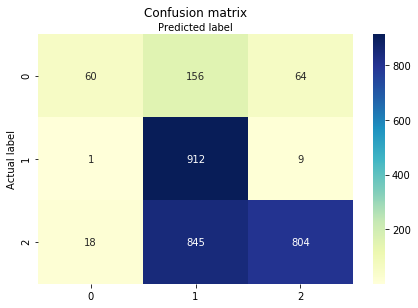

In [21]:
cnf_matrix=confusion_matrix(test_y,predictions1)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(xtrain_tfidf, train_y)
predictions = classifier.predict(xtrain_tfidf)
predictions1 = classifier.predict(xvalid_tfidf)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(train_y,predictions))
print(classification_report(train_y,predictions))
print(accuracy_score(train_y, predictions))
print(confusion_matrix(test_y,predictions1))
print(classification_report(test_y,predictions1))
print(accuracy_score(test_y, predictions1))

[[ 829   50  186]
 [   0 3603   37]
 [   0   36 6733]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1065
           1       0.98      0.99      0.98      3640
           2       0.97      0.99      0.98      6769

    accuracy                           0.97     11474
   macro avg       0.98      0.92      0.95     11474
weighted avg       0.97      0.97      0.97     11474

0.9730695485445354
[[ 109   52  119]
 [   1  876   45]
 [   0  119 1548]]
              precision    recall  f1-score   support

           0       0.99      0.39      0.56       280
           1       0.84      0.95      0.89       922
           2       0.90      0.93      0.92      1667

    accuracy                           0.88      2869
   macro avg       0.91      0.76      0.79      2869
weighted avg       0.89      0.88      0.87      2869

0.8828860230045312


Text(0.5, 257.44, 'Predicted label')

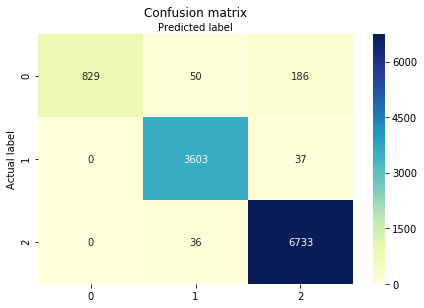

In [29]:
cnf_matrix=confusion_matrix(train_y,predictions)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

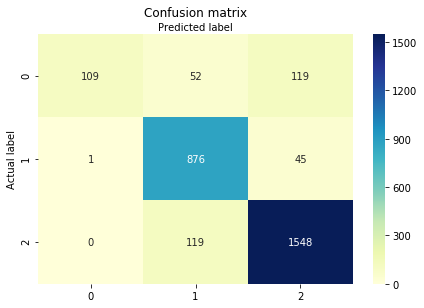

In [30]:
cnf_matrix=confusion_matrix(test_y,predictions1)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain_tfidf, train_y)
predictions = logreg.predict(xtrain_tfidf)
predictions1 = logreg.predict(xvalid_tfidf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(train_y,predictions))
print(classification_report(train_y,predictions))
print(accuracy_score(train_y, predictions))
print(confusion_matrix(test_y,predictions1))
print(classification_report(test_y,predictions1))
print(accuracy_score(test_y, predictions1))

[[ 457  166  442]
 [   2 3515  123]
 [   5  222 6542]]
              precision    recall  f1-score   support

           0       0.98      0.43      0.60      1065
           1       0.90      0.97      0.93      3640
           2       0.92      0.97      0.94      6769

    accuracy                           0.92     11474
   macro avg       0.94      0.79      0.82     11474
weighted avg       0.92      0.92      0.91     11474

0.9163325780024403
[[  80   55  145]
 [   3  854   65]
 [   2  112 1553]]
              precision    recall  f1-score   support

           0       0.94      0.29      0.44       280
           1       0.84      0.93      0.88       922
           2       0.88      0.93      0.91      1667

    accuracy                           0.87      2869
   macro avg       0.89      0.71      0.74      2869
weighted avg       0.87      0.87      0.85      2869

0.8668525618682468


Text(0.5, 257.44, 'Predicted label')

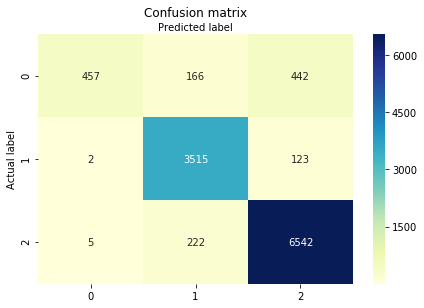

In [33]:
cnf_matrix=confusion_matrix(train_y,predictions)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

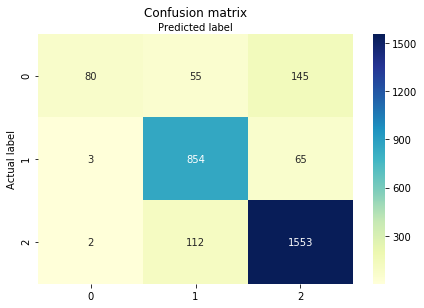

In [34]:
cnf_matrix=confusion_matrix(test_y,predictions1)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
###########Imbalancing
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
bal_xtrain_tfidf, bal_train_y  = smt.fit_resample(xtrain_tfidf, train_y)
bal_xvalid_tfidf, bal_test_y  = smt.fit_resample(xvalid_tfidf, test_y)

In [40]:
from collections import Counter
print(Counter( bal_train_y))
print(Counter(bal_test_y))

Counter({0: 6768, 1: 6749, 2: 6748})
Counter({0: 1667, 2: 1662, 1: 1662})


In [41]:
from collections import Counter
print(Counter(train_y))
print(Counter(test_y))

Counter({2: 6769, 1: 3640, 0: 1065})
Counter({2: 1667, 1: 922, 0: 280})


In [43]:
from sklearn.ensemble import RandomForestClassifier
text_classifier1 = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier1.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = text_classifier1.predict(bal_xtrain_tfidf)
predictions122 = text_classifier1.predict(bal_xvalid_tfidf)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6766    1    1]
 [   0 6749    0]
 [   2   17 6729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6768
           1       1.00      1.00      1.00      6749
           2       1.00      1.00      1.00      6748

    accuracy                           1.00     20265
   macro avg       1.00      1.00      1.00     20265
weighted avg       1.00      1.00      1.00     20265

0.9989637305699481
[[1010  233  424]
 [   1 1621   40]
 [  12  228 1422]]
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1667
           1       0.78      0.98      0.87      1662
           2       0.75      0.86      0.80      1662

    accuracy                           0.81      4991
   macro avg       0.84      0.81      0.81      4991
weighted avg       0.84      0.81      0.81      4991

0.8120617110799438


Text(0.5, 257.44, 'Predicted label')

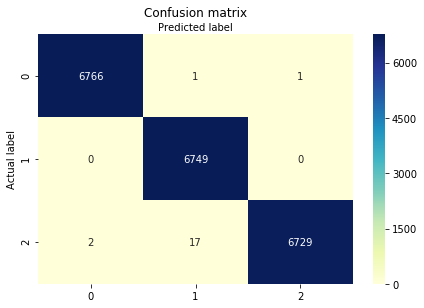

In [45]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

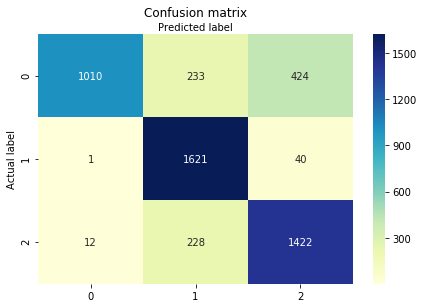

In [46]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=7)
classifier1.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = classifier1.predict(bal_xtrain_tfidf)
predictions122 = classifier1.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6710   55    3]
 [  35 6707    7]
 [1310 2880 2558]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      6768
           1       0.70      0.99      0.82      6749
           2       1.00      0.38      0.55      6748

    accuracy                           0.79     20265
   macro avg       0.84      0.79      0.76     20265
weighted avg       0.84      0.79      0.76     20265

0.7883049592894152
[[1077  563   27]
 [  14 1643    5]
 [ 362  802  498]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1667
           1       0.55      0.99      0.70      1662
           2       0.94      0.30      0.45      1662

    accuracy                           0.64      4991
   macro avg       0.74      0.64      0.62      4991
weighted avg       0.74      0.64      0.62      4991

0.6447605690242436


Text(0.5, 257.44, 'Predicted label')

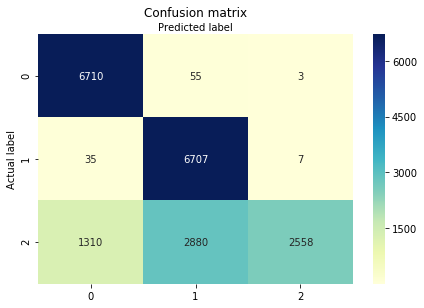

In [48]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

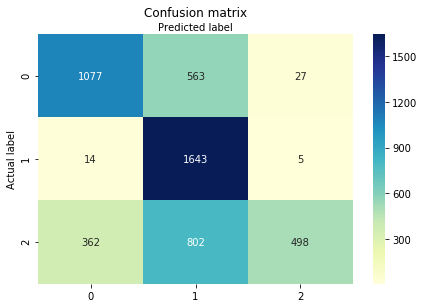

In [49]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = classifier.predict(bal_xtrain_tfidf)
predictions122 = classifier.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6761    3    4]
 [   1 6738   10]
 [  25   37 6686]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6768
           1       0.99      1.00      1.00      6749
           2       1.00      0.99      0.99      6748

    accuracy                           1.00     20265
   macro avg       1.00      1.00      1.00     20265
weighted avg       1.00      1.00      1.00     20265

0.996052306933136
[[1152  246  269]
 [   4 1611   47]
 [  12  126 1524]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1667
           1       0.81      0.97      0.88      1662
           2       0.83      0.92      0.87      1662

    accuracy                           0.86      4991
   macro avg       0.88      0.86      0.86      4991
weighted avg       0.88      0.86      0.86      4991

0.8589461029853737


Text(0.5, 257.44, 'Predicted label')

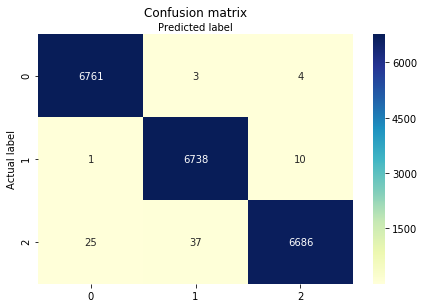

In [51]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

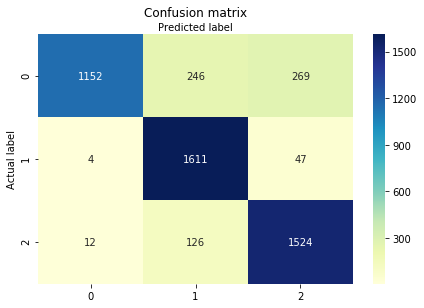

In [52]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = logreg1.predict(bal_xtrain_tfidf)
predictions122 = logreg1.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6686   33   49]
 [  30 6627   92]
 [ 168  338 6242]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6768
           1       0.95      0.98      0.96      6749
           2       0.98      0.93      0.95      6748

    accuracy                           0.96     20265
   macro avg       0.97      0.96      0.96     20265
weighted avg       0.97      0.96      0.96     20265

0.9649642240315816
[[1073  237  357]
 [  12 1591   59]
 [  70  153 1439]]
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1667
           1       0.80      0.96      0.87      1662
           2       0.78      0.87      0.82      1662

    accuracy                           0.82      4991
   macro avg       0.84      0.82      0.82      4991
weighted avg       0.84      0.82      0.82      4991

0.8220797435383691


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 257.44, 'Predicted label')

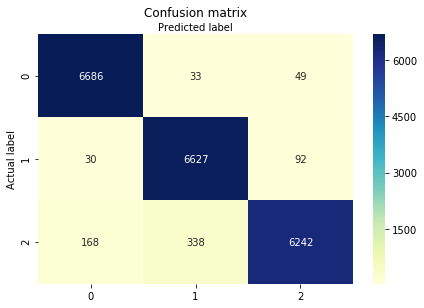

In [54]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

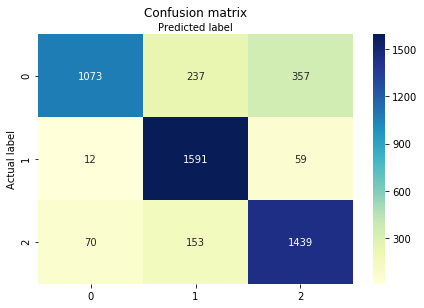

In [55]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
####Using SMOTEENN
from imblearn.combine import SMOTEENN
smteen = SMOTEENN(random_state=42)
bal_xtrain_tfidf, bal_train_y  = smteen.fit_resample(xtrain_tfidf, train_y)
bal_xvalid_tfidf, bal_test_y  = smteen.fit_resample(xvalid_tfidf, test_y)

In [57]:
from collections import Counter
print(Counter( bal_train_y))
print(Counter(bal_test_y))

Counter({0: 6682, 1: 6557, 2: 2367})
Counter({0: 1590, 1: 1204, 2: 230})


In [60]:
from sklearn.ensemble import RandomForestClassifier
text_classifier2 = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier2.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = text_classifier2.predict(bal_xtrain_tfidf)
predictions122 = text_classifier2.predict(bal_xvalid_tfidf)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6682    0    0]
 [   0 6557    0]
 [   0    0 2367]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6682
           1       1.00      1.00      1.00      6557
           2       1.00      1.00      1.00      2367

    accuracy                           1.00     15606
   macro avg       1.00      1.00      1.00     15606
weighted avg       1.00      1.00      1.00     15606

1.0
[[1314  234   42]
 [   0 1204    0]
 [   4   12  214]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      1590
           1       0.83      1.00      0.91      1204
           2       0.84      0.93      0.88       230

    accuracy                           0.90      3024
   macro avg       0.89      0.92      0.90      3024
weighted avg       0.92      0.90      0.90      3024

0.9034391534391535


Text(0.5, 257.44, 'Predicted label')

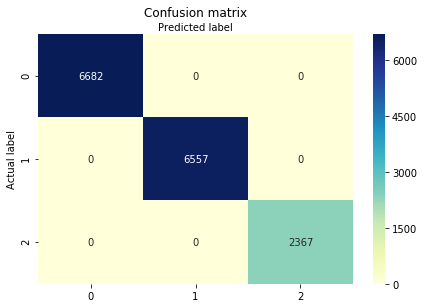

In [62]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

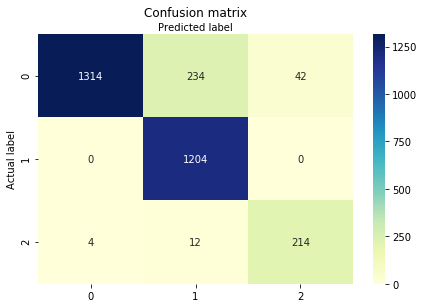

In [63]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier31 = KNeighborsClassifier(n_neighbors=7)
classifier31.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = classifier31.predict(bal_xtrain_tfidf)
predictions122 = classifier31.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6671   11    0]
 [   6 6548    3]
 [  99   21 2247]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6682
           1       1.00      1.00      1.00      6557
           2       1.00      0.95      0.97      2367

    accuracy                           0.99     15606
   macro avg       0.99      0.98      0.99     15606
weighted avg       0.99      0.99      0.99     15606

0.9910290913751121
[[1086  495    9]
 [   6 1196    2]
 [  31   12  187]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1590
           1       0.70      0.99      0.82      1204
           2       0.94      0.81      0.87       230

    accuracy                           0.82      3024
   macro avg       0.87      0.83      0.83      3024
weighted avg       0.86      0.82      0.82      3024

0.816468253968254


Text(0.5, 257.44, 'Predicted label')

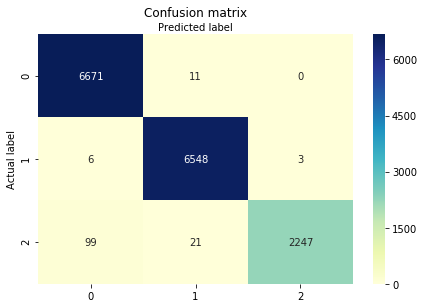

In [65]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

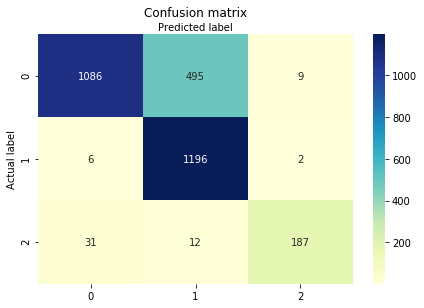

In [66]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = classifier.predict(bal_xtrain_tfidf)
predictions122 = classifier.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6682    0    0]
 [   0 6557    0]
 [   3    1 2363]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6682
           1       1.00      1.00      1.00      6557
           2       1.00      1.00      1.00      2367

    accuracy                           1.00     15606
   macro avg       1.00      1.00      1.00     15606
weighted avg       1.00      1.00      1.00     15606

0.9997436883250032
[[1258  228  104]
 [   1 1203    0]
 [   3    8  219]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1590
           1       0.84      1.00      0.91      1204
           2       0.68      0.95      0.79       230

    accuracy                           0.89      3024
   macro avg       0.84      0.91      0.86      3024
weighted avg       0.91      0.89      0.89      3024

0.8862433862433863


Text(0.5, 257.44, 'Predicted label')

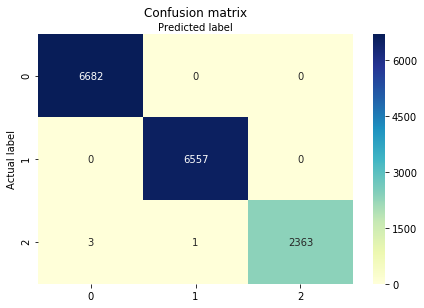

In [68]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

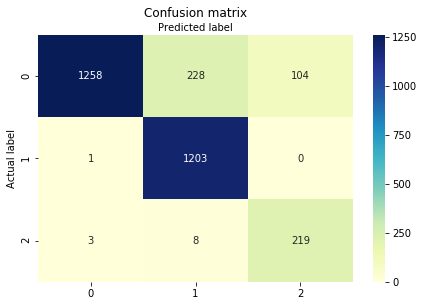

In [69]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(bal_xtrain_tfidf, bal_train_y)
predictions12 = logreg1.predict(bal_xtrain_tfidf)
predictions122 = logreg1.predict(bal_xvalid_tfidf)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bal_train_y,predictions12))
print(classification_report(bal_train_y,predictions12))
print(accuracy_score(bal_train_y, predictions12))
print(confusion_matrix(bal_test_y,predictions122))
print(classification_report(bal_test_y,predictions122))
print(accuracy_score(bal_test_y, predictions122))

[[6646   32    4]
 [  36 6514    7]
 [ 136   33 2198]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6682
           1       0.99      0.99      0.99      6557
           2       1.00      0.93      0.96      2367

    accuracy                           0.98     15606
   macro avg       0.99      0.97      0.98     15606
weighted avg       0.98      0.98      0.98     15606

0.9841086761501986
[[1302  198   90]
 [   4 1197    3]
 [  16    7  207]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1590
           1       0.85      0.99      0.92      1204
           2       0.69      0.90      0.78       230

    accuracy                           0.89      3024
   macro avg       0.84      0.90      0.86      3024
weighted avg       0.91      0.89      0.90      3024

0.8948412698412699


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 257.44, 'Predicted label')

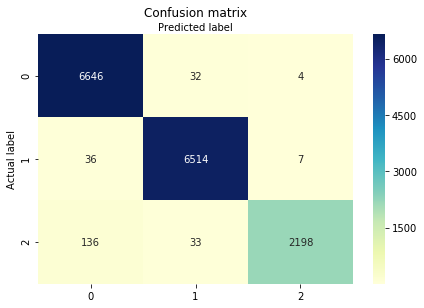

In [71]:
cnf_matrix=confusion_matrix(bal_train_y,predictions12)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

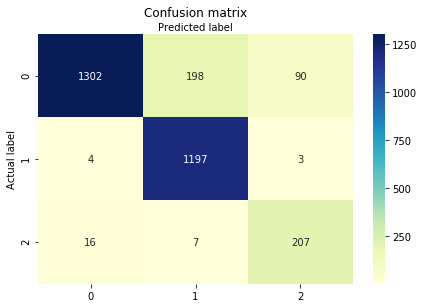

In [72]:
cnf_matrix=confusion_matrix(bal_test_y,predictions122)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')